In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'])

In [4]:
df=df.fillna(df.mean())

/tmp/ipykernel_66559/3358723971.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean())


In [5]:
date_info = np.stack((df.dt.dt.year.values, df.dt.dt.month.values, df.dt.dt.day.values,\
                      df.dt.dt.hour.values, df.dt.dt.minute.values,df.dt.dt.weekday.values),1)

In [8]:
# turn into consecutive integer for embedding layer
date_info = OrdinalEncoder().fit_transform(date_info).astype(np.int64)

In [25]:
# split train val
df_train = df.iloc[:-100000]
df_val = df.iloc[-100000:]

date_train = date_info[:-100000]
date_val = date_info[-100000:]

In [30]:
# normalize inputs
mean_ = df_train.iloc[:,1:].mean().values
std_ = df_train.iloc[:,1:].std().values

X_train = (df_train.iloc[:,1:].values - mean_)/std_
X_val = (df_val.iloc[:,1:].values - mean_)/std_
y_train, y_val = df_train.iloc[:,1:].values, df_val.iloc[:,1:].values

In [45]:
# map to np.float32
X_train,X_val,y_train,y_val = list(map(lambda x:x.astype(np.float32), (X_train,X_val,y_train,y_val)))

In [59]:
np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
np.save('date_train.npy', date_train)
np.save('date_val.npy', date_val)

In [2]:
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
date_train = np.load('date_train.npy')
date_val = np.load('date_val.npy')

In [46]:
[len(np.unique(date_train[:,i],axis=0)) for i in range(6)]

[5, 12, 31, 24, 60, 7]

In [9]:
x,date,y = next(iter(data))

In [10]:
date.shape

torch.Size([32, 3, 6])

In [12]:
import torch
import torch.nn as nn

In [61]:
date[:,:,i].unique()

tensor([2010])

In [25]:
class ODE_timeSeries(nn.Module):
    def __init__(self, d, d_target, layers_time, layers_depth, num_heads, BN, dropout, time_fun,T,\
                 d_enc, layers_enc, num_heads_enc, BN_enc, dropout_enc):
        # encoder_d is a tuple (87,128)
        super(ODE_timeSeries, self).__init__()
        self.encoder = ODE_Encoder(d_enc, layers_enc, num_heads_enc, BN_enc, dropout_enc, time_fun)
        self.decoder = ODE_Decoder(d, d_target, layers_time, layers_depth, num_heads, BN, dropout, time_fun,T)
        self.embed = nn.ModuleList([nn.Embedding(card,d) for d,card in zip(emb_dims,emb_card)])
        self.model_input = nn.Sequential(nn.Linear(np.sum(emb_dims)+d_raw,d_enc),nn.Mish())
    
    def forward(self,x,date):
        # x,date have shape (N,T,d)
        out = torch.cat([e(date[:,:,i]) for i,e in enumerate(self.embed)]+[x],2)
        out = self.model_input(out).transpose(0,1) 
        out = self.encoder(out) # T,N,d

In [ ]:
d, d_target, layers_time, layers_depth, num_heads, BN, dropout, T = 256,7,2,2,8,True,0.1,12
time_fun = lambda t,x: torch.ones(x.shape[-1],device=x.device)*t
d_enc, layers_enc, num_heads_enc, BN_enc, dropout_enc = 128,2,

In [ ]:
encoder = , decoder, embed, encoder_d

In [ ]:
ODE_timeSeries()

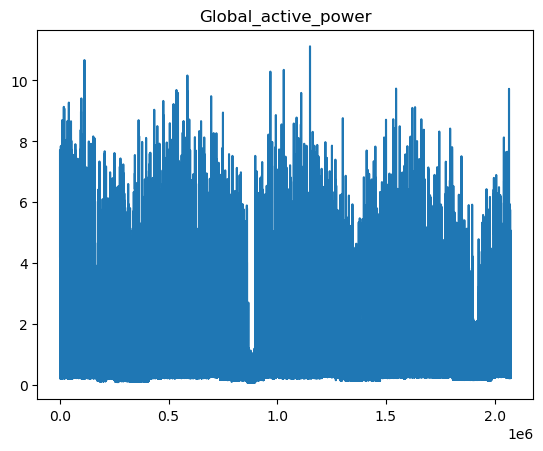

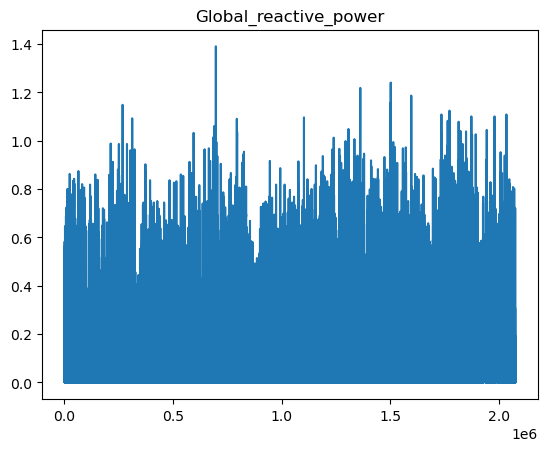

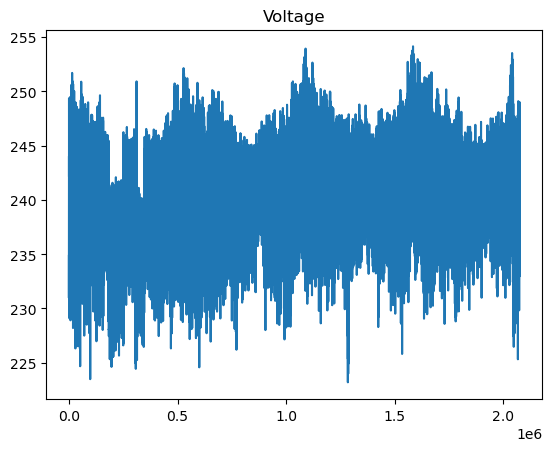

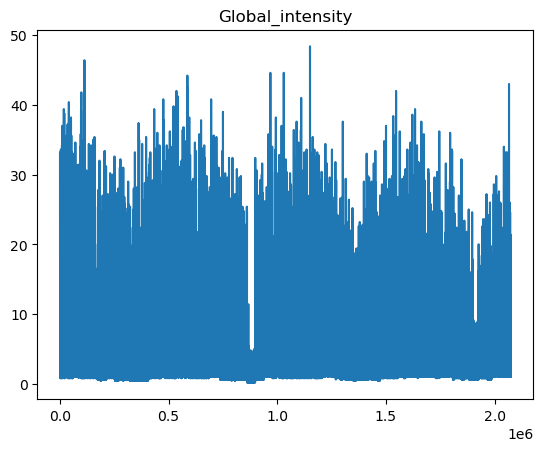

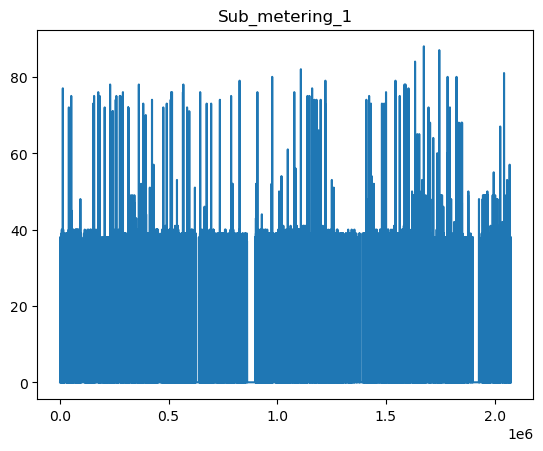

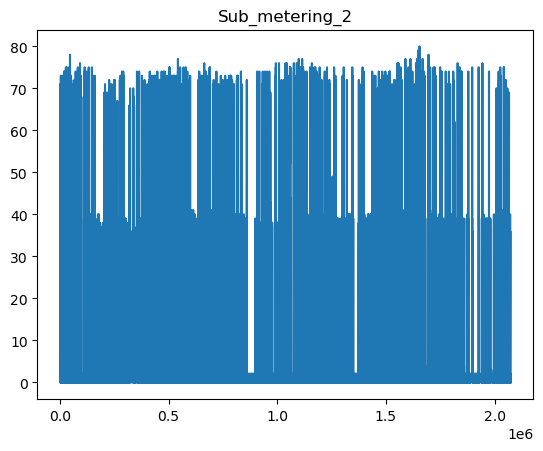

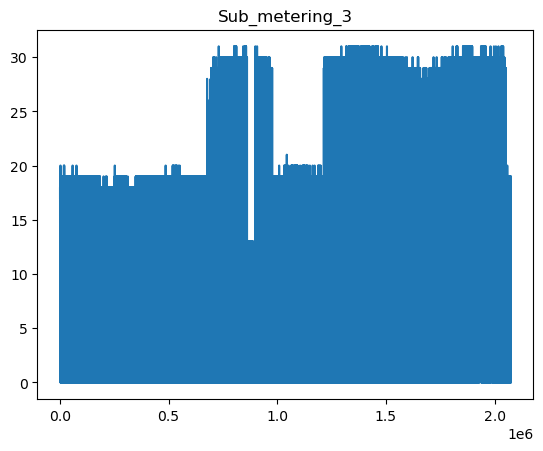

In [19]:
for i in range(1,8):
    df.iloc[:,i].plot(title=df.columns[i])
    plt.show()